In [1]:
%conda install matplotlib -y
%pip install gdown

import sklearn.svm as svm
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# K-Nearest Neighbor - practice

## Classifying drinking availability

The following is data containing various information related to water and whether it is drinkable. Use KNN to predict drinkability, but achieve at least 60% accuracy.

In [2]:
gdown.download("https://drive.google.com/uc?id=1Hr792DKij8Tp0LWxMBf9vrzouopGFdjH", "water.csv", quiet=False)
water = pd.read_csv('water.csv')
water.head()

Downloading...
From: https://drive.google.com/uc?id=1Hr792DKij8Tp0LWxMBf9vrzouopGFdjH
To: /Users/choijennifer/water.csv
100%|████████████████████████████████████████| 525k/525k [00:00<00:00, 1.24MB/s]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
water=water.dropna()

In [4]:
list(water.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [5]:
new_columns_names =['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

<Axes: >

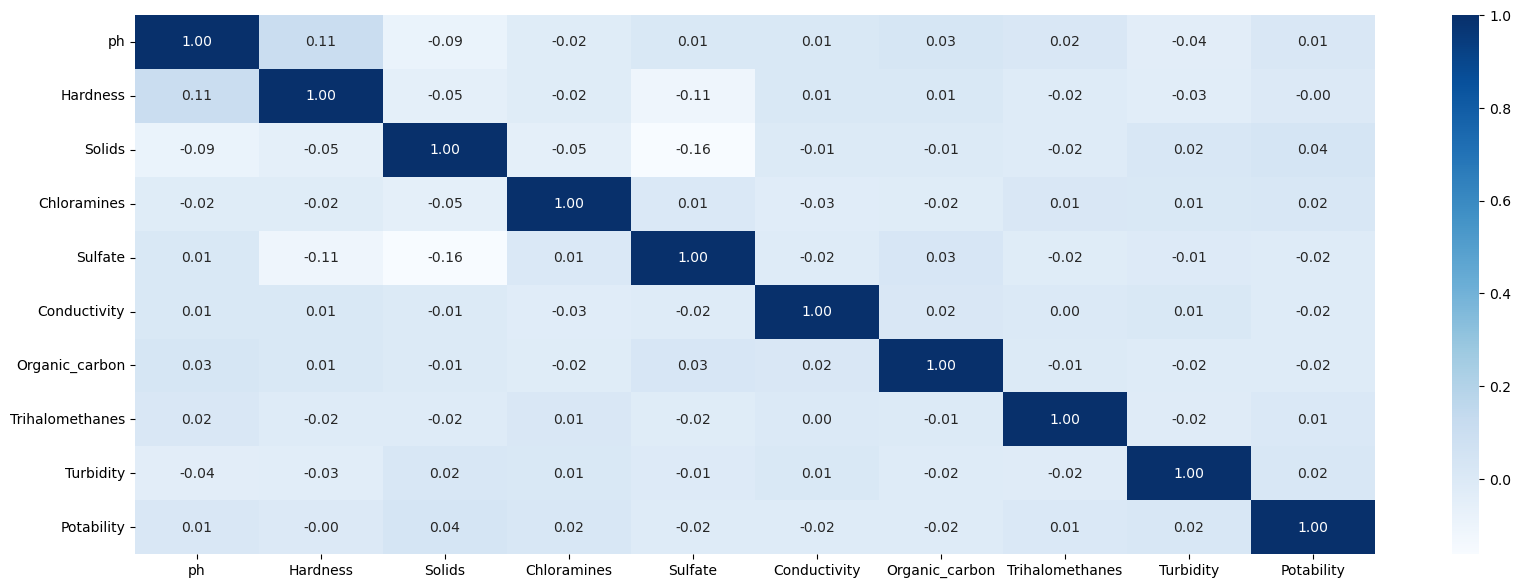

In [6]:
corr = water[new_columns_names].corr() 
plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import sklearn.svm as svm


train, test = train_test_split(water, test_size=.2, random_state=2)
train_X = train[new_columns_names]
train_Y = train["Potability"]

test_X = test[new_columns_names]
test_Y = test["Potability"]

logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_Y)

logistic_accuracy = logistic_model.score(test_X, test_Y)

print(f"Logistic Regression accuracy: {logistic_accuracy}")


svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_X, train_Y)

svm_accuracy = svm_model.score(test_X, test_Y)

print(f"SVM accuracy: {svm_accuracy}")

/Users/choijennifer/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.8833746898263027
SVM accuracy: 0.9776674937965261


In [8]:
X = water.iloc[:, :-1].values
y = water.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
accs = []

for k in range(1, 7):
    if k ==2:
        continue

    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))

print(f"Average accuracy according to the value of k(k=1, 3, 4, ..., 6): {accs}")

Average accuracy according to the value of k(k=1, 3, 4, ..., 6): [0.5905707196029777, 0.6451612903225806, 0.6724565756823822, 0.6575682382133995, 0.674937965260546]
